In [3]:
import cv2
import pandas as pd
from skimage import filters
from skimage.measure import regionprops
from skimage.color import label2rgb
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

In [4]:
parent_dir = r"C:\Users\Asus\Desktop\PCD\Raw DATASET"
new_dir = r"C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset"
mode = 0o666

In [5]:
df = pd.read_excel(r"C:\Users\Asus\Desktop\PCD\Organized dataset\metadata\metadata_good2.0.xlsx")

In [6]:
full_mammo_path = df['image full mammo path']
mask_path = df['ROI mask file path']
a = list(df['patient_id'])
b = list(df['left or right breast'])
c = list(df['image view'])
e = list(df['abnormality id'])

In [7]:
azerty = [a[i] + "\\" + b[i] + "_" + c[i] for i in range(len(a))]
dic = dict()
for i in azerty:
    dic[i] = azerty.count(i)
print(dic)

{'P_00001\\LEFT_CC': 1, 'P_00001\\LEFT_MLO': 1, 'P_00004\\LEFT_CC': 1, 'P_00004\\LEFT_MLO': 1, 'P_00004\\RIGHT_MLO': 1, 'P_00009\\RIGHT_CC': 1, 'P_00009\\RIGHT_MLO': 1, 'P_00015\\LEFT_MLO': 1, 'P_00016\\LEFT_CC': 1, 'P_00016\\LEFT_MLO': 1, 'P_00017\\LEFT_CC': 1, 'P_00017\\LEFT_MLO': 1, 'P_00018\\RIGHT_CC': 1, 'P_00018\\RIGHT_MLO': 1, 'P_00021\\LEFT_CC': 1, 'P_00021\\LEFT_MLO': 1, 'P_00021\\RIGHT_CC': 1, 'P_00021\\RIGHT_MLO': 1, 'P_00023\\RIGHT_CC': 1, 'P_00023\\RIGHT_MLO': 1, 'P_00026\\LEFT_CC': 1, 'P_00026\\LEFT_MLO': 1, 'P_00027\\RIGHT_CC': 1, 'P_00027\\RIGHT_MLO': 1, 'P_00032\\RIGHT_CC': 1, 'P_00032\\RIGHT_MLO': 1, 'P_00034\\RIGHT_CC': 1, 'P_00034\\RIGHT_MLO': 1, 'P_00037\\RIGHT_CC': 1, 'P_00037\\RIGHT_MLO': 1, 'P_00039\\RIGHT_CC': 1, 'P_00039\\RIGHT_MLO': 1, 'P_00041\\LEFT_CC': 1, 'P_00041\\LEFT_MLO': 1, 'P_00044\\RIGHT_CC': 4, 'P_00044\\RIGHT_MLO': 2, 'P_00045\\LEFT_CC': 1, 'P_00045\\LEFT_MLO': 1, 'P_00046\\RIGHT_MLO': 1, 'P_00051\\LEFT_CC': 1, 'P_00051\\LEFT_MLO': 1, 'P_00054\\RI

# Creation fichier

In [6]:
E = set(df['patient_id'])

In [10]:
for i in E:
    directory = f"{i}"
    path = os.path.join(new_dir, directory)
    os.mkdir(path, mode)
    print("Directory '% s' created" % directory)

Directory 'P_01716' created
Directory 'P_00064' created
Directory 'P_01395' created
Directory 'P_00576' created
Directory 'P_00242' created
Directory 'P_01803' created
Directory 'P_00303' created
Directory 'P_00375' created
Directory 'P_01386' created
Directory 'P_00634' created
Directory 'P_00510' created
Directory 'P_00465' created
Directory 'P_00707' created
Directory 'P_01083' created
Directory 'P_01189' created
Directory 'P_01221' created
Directory 'P_01717' created
Directory 'P_00549' created
Directory 'P_00528' created
Directory 'P_00882' created
Directory 'P_01737' created
Directory 'P_00849' created
Directory 'P_00294' created
Directory 'P_00931' created
Directory 'P_00564' created
Directory 'P_00354' created
Directory 'P_01430' created
Directory 'P_01434' created
Directory 'P_00699' created
Directory 'P_00413' created
Directory 'P_00996' created
Directory 'P_00865' created
Directory 'P_01348' created
Directory 'P_00605' created
Directory 'P_00317' created
Directory 'P_00376' 

## Creation MLL or CC files

In [11]:
mylist = list(dict.fromkeys([a[i] + "\\" + b[i] + "_" + f'{c[i]}' for i in range(len(a))]))

for dir_basename in mylist:
    path = os.path.join(new_dir, dir_basename)
    os.mkdir(path, mode)
    print("Directory '% s' created" % path)


Directory 'C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00001\LEFT_CC' created
Directory 'C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00001\LEFT_MLO' created
Directory 'C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00004\LEFT_CC' created
Directory 'C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00004\LEFT_MLO' created
Directory 'C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00004\RIGHT_MLO' created
Directory 'C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00009\RIGHT_CC' created
Directory 'C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00009\RIGHT_MLO' created
Directory 'C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00015\LEFT_MLO' created
Directory 'C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00016\LEFT_CC' created
Directory 'C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00016

## Création des sous fichiers abnormality

In [12]:
for directory, index_ab in zip(dic.keys(), dic.values()):
    path = os.path.join(new_dir, directory)
    for i in range(index_ab):
        why = os.path.join(path, f"abnormality_{i}")
        os.mkdir(why, mode)
    print("Directory '% s' created" % path)

Directory 'C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00001\LEFT_CC' created
Directory 'C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00001\LEFT_MLO' created
Directory 'C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00004\LEFT_CC' created
Directory 'C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00004\LEFT_MLO' created
Directory 'C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00004\RIGHT_MLO' created
Directory 'C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00009\RIGHT_CC' created
Directory 'C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00009\RIGHT_MLO' created
Directory 'C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00015\LEFT_MLO' created
Directory 'C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00016\LEFT_CC' created
Directory 'C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00016

## Preprocessing the Dataset

In [50]:
import cv2
import numpy as np
from matplotlib import image as mpimg


def sum_masks(mask_list):
    """
    mask_list : {list of numpy.ndarray}
        A list of masks (numpy.ndarray) that needs to be summed.
    Returns
    -------
    summed_mask_bw: {numpy.ndarray}
        The summed mask, ranging from [0, 1].
    """
    summed_mask = np.zeros(mask_list[0].shape)

    for arr in mask_list:
        summed_mask = np.add(summed_mask, arr)

    # Binarize (there might be some overlap, resulting in pixels with
    # values of 510, 765, etc...)
    _, summed_mask_bw = cv2.threshold(src=summed_mask, thresh=1, maxval=255, type=cv2.THRESH_BINARY)
    return summed_mask_bw


def whole_mask(direct, number_masks):
    basename_file = r'GT_mask.jpg'
    list_mask_path = []

    for i in range(number_masks):
        temp = os.path.join(direct, f"abnormality_{i}")
        name_file = os.path.join(temp, basename_file)
        print(name_file)
        list_mask_path.append(name_file)
    if len(list_mask_path) != 1:
        print(list_mask_path)
        mask_list = [mpimg.imread(pa) for pa in list_mask_path]
        return True, sum_masks(mask_list)
    else:
        print('There is only one mask no need to sum anything')
        return False, []




In [ ]:
import os
import cv2
import shutil

for directory, index_ab in zip(dic.keys(), dic.values()):

    mask_p = os.path.join(r"C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset", directory)
    #print(mask_p)
    var, pic = whole_mask(mask_p, index_ab)
    if var == False:
        a = os.path.join(mask_p, r"abnormality_0\GT_mask.jpg")
        b = os.path.join(mask_p, "GT_mask.jpg")
        shutil.copyfile(a, b)
        continue

    b = os.path.join(mask_p, "GT_mask.jpg")
    print(b)
    cv2.imwrite(b, pic)

    plt.imshow(pic)


C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00001\LEFT_CC\abnormality_0\GT_mask.jpg
There is only one mask no need to sum anything
C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00001\LEFT_MLO\abnormality_0\GT_mask.jpg
There is only one mask no need to sum anything
C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00004\LEFT_CC\abnormality_0\GT_mask.jpg
There is only one mask no need to sum anything
C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00004\LEFT_MLO\abnormality_0\GT_mask.jpg
There is only one mask no need to sum anything
C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00004\RIGHT_MLO\abnormality_0\GT_mask.jpg
There is only one mask no need to sum anything
C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00009\RIGHT_CC\abnormality_0\GT_mask.jpg
There is only one mask no need to sum anything
C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_0000

In [48]:
import winsound

frequency = 2500  # Set Frequency To 2500 Hertz
duration = 1000  # Set Duration To 1000 ms == 1 second
winsound.Beep(frequency, duration)  # so bad it hertz my ears

In [ ]:
for directory, index_ab in zip(dic.keys(), dic.values()):
    new_path = os.path.join(parent_dir, directory)
    print(new_path)
    name_dir = os.path.join(new_path, r'Predicted_Mask')
    os.rmdir(name_dir)
    print("Directory '% s' created" % name_dir)

## Center of the mass

(2640.695780559219, 444.52633936347576)


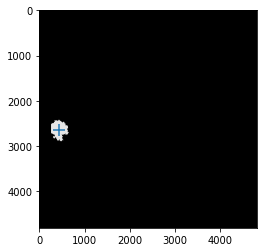

In [8]:
image = mpimg.imread(r'C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00001\left_CC\GT_mask.jpg')
threshold_value = filters.threshold_otsu(image)
labeled_foreground = (image > threshold_value).astype(int)
properties = regionprops(labeled_foreground, image)
center_of_mass = properties[0].centroid
weighted_center_of_mass = properties[0].weighted_centroid

print(center_of_mass)

colorized = label2rgb(labeled_foreground, image, colors=['black', 'red'], alpha=0.1)
fig, ax = plt.subplots()
ax.imshow(colorized)
# Note the inverted coordinates because plt uses (x, y) while NumPy uses (row, column)
ax.scatter(center_of_mass[1], center_of_mass[0], s=160, c='C0', marker='+')
plt.show()

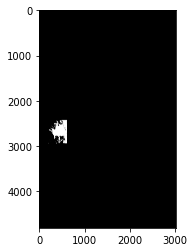

In [7]:
from my_site.image.Traitement_image.Restore_image import restore_mask

mask_path_gr = r"C:\Users\Asus\Desktop\PCD\Organized dataset\curated\P_00001\LEFT_CC\abnormality_0\GT_mask.jpg"
res = r"C:\Users\Asus\PycharmProjects\pythonProject1\temp\FCM_cluster_2_sample_0_inv.jpg"
im = restore_mask(mask_path_gr, res, (515, 431), (2640, 444))
plt.imshow(im, cmap="gray")

In [9]:
df = pd.read_excel(r'C:\Users\Asus\Desktop\PCD\Organized dataset\metadata\metadata_good2.0.xlsx')
p_id = df['patient_id']
full_mammo_path = df['image full mammo path']
mask_path = df['ROI mask file path']
#cropped = df['cropped image file path']
a = list(df['patient_id'])
b = list(df['left or right breast'])
c = list(df['image view'])
e = list(df['abnormality id'])
print(mask_path)

0         P_00001\LEFT_CC\abnormality_0\GT_mask.jpg
1        P_00001\LEFT_MLO\abnormality_0\GT_mask.jpg
2         P_00004\LEFT_CC\abnormality_0\GT_mask.jpg
3        P_00004\LEFT_MLO\abnormality_0\GT_mask.jpg
4       P_00004\RIGHT_MLO\abnormality_0\GT_mask.jpg
                           ...                     
1691    P_02033\RIGHT_MLO\abnormality_0\GT_mask.jpg
1692     P_02079\RIGHT_CC\abnormality_0\GT_mask.jpg
1693    P_02079\RIGHT_MLO\abnormality_0\GT_mask.jpg
1694      P_02092\LEFT_CC\abnormality_0\GT_mask.jpg
1695     P_02092\LEFT_MLO\abnormality_0\GT_mask.jpg
Name: ROI mask file path, Length: 1696, dtype: object


In [10]:
import os

center_of_ROIs = []
for path in mask_path:
    abs_path = os.path.join(r'C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset', path)
    image = mpimg.imread(abs_path)
    print(abs_path)
    threshold_value = filters.threshold_otsu(image)
    labeled_foreground = (image > threshold_value).astype(int)
    properties = regionprops(labeled_foreground, image)
    center_of_mass = properties[0].centroid
    weighted_center_of_mass = properties[0].weighted_centroid

    A = int(center_of_mass[0]), int(center_of_mass[1])
    print(A)
    center_of_ROIs.append(A)

C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00001\LEFT_CC\abnormality_0\GT_mask.jpg
(2640, 444)
C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00001\LEFT_MLO\abnormality_0\GT_mask.jpg
(3097, 375)
C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00004\LEFT_CC\abnormality_0\GT_mask.jpg
(3710, 1371)
C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00004\LEFT_MLO\abnormality_0\GT_mask.jpg
(3247, 1201)
C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00004\RIGHT_MLO\abnormality_0\GT_mask.jpg
(3973, 914)
C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00009\RIGHT_CC\abnormality_0\GT_mask.jpg
(2281, 584)
C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00009\RIGHT_MLO\abnormality_0\GT_mask.jpg
(2676, 678)
C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00015\LEFT_MLO\abnormality_0\GT_mask.jpg
(2441, 722)
C:\Users\Asus\Desktop\PCD\Organized da

In [11]:
df['center of roi preprocessed'] = center_of_ROIs
df.to_excel(r'C:\Users\Asus\Desktop\PCD\Organized dataset\metadata\metadata_good2.0.xlsx', index=False)

## Region of interest shape

In [ ]:
df_old = pd.read_excel(r'C:\Users\Asus\Desktop\PCD\Organized dataset\metadata\metadata.xlsx')
cropped = df_old['cropped image file path']
list_shape_crop = []
for path in cropped:
    abs_path = os.path.join(r'C:\Users\Asus\Desktop\PCD\Organized dataset\images', path)
    print(abs_path)
    image = mpimg.imread(abs_path)
    list_shape_crop.append(image.shape)
    print(image.shape)


In [77]:
df['Shape of cropped image'] = list_shape_crop
df.to_excel(r'C:\Users\Asus\Desktop\PCD\Organized dataset\metadata\metadata_good2.0.xlsx', index=False)

## train test label folder structure

In [6]:
df.describe()

abnormality id
count     1696.000000
mean         1.089623
std          0.403800
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          6.000000

In [7]:
print(df)

     patient_id left or right breast image view  abnormality id  \
0       P_00001                 LEFT         CC               1   
1       P_00001                 LEFT        MLO               1   
2       P_00004                 LEFT         CC               1   
3       P_00004                 LEFT        MLO               1   
4       P_00004                RIGHT        MLO               1   
...         ...                  ...        ...             ...   
1691    P_02033                RIGHT        MLO               1   
1692    P_02079                RIGHT         CC               1   
1693    P_02079                RIGHT        MLO               1   
1694    P_02092                 LEFT         CC               1   
1695    P_02092                 LEFT        MLO               1   

        description          file path             image full mammo path  \
0     Mass-Training    P_00001\LEFT_CC    P_00001\LEFT_CC\full_mammo.jpg   
1     Mass-Training   P_00001\LEFT_MLO   P_

In [8]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df

patient_id left or right breast image view  abnormality id  \
0       P_00001                 LEFT         CC               1   
1       P_00001                 LEFT        MLO               1   
2       P_00004                 LEFT         CC               1   
3       P_00004                 LEFT        MLO               1   
4       P_00004                RIGHT        MLO               1   
5       P_00009                RIGHT         CC               1   
6       P_00009                RIGHT        MLO               1   
7       P_00015                 LEFT        MLO               1   
8       P_00016                 LEFT         CC               1   
9       P_00016                 LEFT        MLO               1   
10      P_00017                 LEFT         CC               1   
11      P_00017                 LEFT        MLO               1   
12      P_00018                RIGHT         CC               1   
13      P_00018                RIGHT        MLO               1   
14      P_00021                 LEFT         CC               1   
15      P_00021                 LEFT        MLO               1   
16      P_00021                RIGHT         CC               1   
17      P_00021                RIGHT        MLO               1   
18      P_00023                RIGHT         CC               1   
19      P_00023                RIGHT        MLO               1   
20      P_00026                 LEFT         CC               1   
21      P_00026                 LEFT        MLO               1   
22      P_00027                RIGHT         CC               1   
23      P_00027                RIGHT        MLO               1   
24      P_00032                RIGHT         CC               1   
25      P_00032                RIGHT        MLO               1   
26      P_00034                RIGHT         CC               1   
27      P_00034                RIGHT        MLO               1   
28      P_00037                RIGHT         CC               1   
29      P_00037                RIGHT        MLO               1   
30      P_00039                RIGHT         CC               1   
31      P_00039                RIGHT        MLO               1   
32      P_00041                 LEFT         CC               1   
33      P_00041                 LEFT        MLO               1   
34      P_00044                RIGHT         CC               1   
35      P_00044                RIGHT         CC               2   
36      P_00044                RIGHT         CC               3   
37      P_00044                RIGHT         CC               4   
38      P_00044                RIGHT        MLO               1   
39      P_00044                RIGHT        MLO               2   
40      P_00045                 LEFT         CC               1   
41      P_00045                 LEFT        MLO               1   
42      P_00046                RIGHT        MLO               1   
43      P_00051                 LEFT         CC               1   
44      P_00051                 LEFT        MLO               1   
45      P_00054                RIGHT        MLO               1   
46      P_00055                 LEFT         CC               1   
47      P_00056                 LEFT        MLO               1   
48      P_00057                RIGHT         CC               1   
49      P_00057                RIGHT        MLO               1   
50      P_00058                RIGHT         CC               1   
51      P_00059                 LEFT         CC               1   
52      P_00059                 LEFT        MLO               1   
53      P_00061                RIGHT         CC               1   
54      P_00061                RIGHT        MLO               1   
55      P_00064                RIGHT        MLO               1   
56      P_00065                 LEFT         CC               1   
57      P_00065                 LEFT        MLO               1   
58      P_00066                 LEFT         CC     

In [9]:
rslt_df = df[df['description'] == 'Mass-Training']
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
rslt_df

patient_id left or right breast image view  abnormality id  \
0       P_00001                 LEFT         CC               1   
1       P_00001                 LEFT        MLO               1   
2       P_00004                 LEFT         CC               1   
3       P_00004                 LEFT        MLO               1   
4       P_00004                RIGHT        MLO               1   
5       P_00009                RIGHT         CC               1   
6       P_00009                RIGHT        MLO               1   
7       P_00015                 LEFT        MLO               1   
12      P_00018                RIGHT         CC               1   
13      P_00018                RIGHT        MLO               1   
14      P_00021                 LEFT         CC               1   
15      P_00021                 LEFT        MLO               1   
16      P_00021                RIGHT         CC               1   
17      P_00021                RIGHT        MLO               1   
18      P_00023                RIGHT         CC               1   
19      P_00023                RIGHT        MLO               1   
20      P_00026                 LEFT         CC               1   
21      P_00026                 LEFT        MLO               1   
22      P_00027                RIGHT         CC               1   
23      P_00027                RIGHT        MLO               1   
26      P_00034                RIGHT         CC               1   
27      P_00034                RIGHT        MLO               1   
30      P_00039                RIGHT         CC               1   
31      P_00039                RIGHT        MLO               1   
32      P_00041                 LEFT         CC               1   
33      P_00041                 LEFT        MLO               1   
34      P_00044                RIGHT         CC               1   
35      P_00044                RIGHT         CC               2   
36      P_00044                RIGHT         CC               3   
37      P_00044                RIGHT         CC               4   
38      P_00044                RIGHT        MLO               1   
39      P_00044                RIGHT        MLO               2   
40      P_00045                 LEFT         CC               1   
41      P_00045                 LEFT        MLO               1   
42      P_00046                RIGHT        MLO               1   
43      P_00051                 LEFT         CC               1   
44      P_00051                 LEFT        MLO               1   
45      P_00054                RIGHT        MLO               1   
46      P_00055                 LEFT         CC               1   
48      P_00057                RIGHT         CC               1   
49      P_00057                RIGHT        MLO               1   
50      P_00058                RIGHT         CC               1   
51      P_00059                 LEFT         CC               1   
52      P_00059                 LEFT        MLO               1   
53      P_00061                RIGHT         CC               1   
54      P_00061                RIGHT        MLO               1   
55      P_00064                RIGHT        MLO               1   
56      P_00065                 LEFT         CC               1   
57      P_00065                 LEFT        MLO               1   
60      P_00068                RIGHT         CC               1   
61      P_00068                RIGHT        MLO               1   
62      P_00074                 LEFT        MLO               1   
63      P_00074                RIGHT         CC               1   
64      P_00074                RIGHT        MLO               1   
65      P_00076                 LEFT         CC               1   
66      P_00076                 LEFT        MLO               1   
67      P_00079                RIGHT         CC               1   
68      P_00079                RIGHT        MLO               1   
69      P_00080                RIGHT         CC     

In [10]:
rslt_df_test = df[df['description'] == 'Mass-Test']
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
rslt_df_test

patient_id left or right breast image view  abnormality id description  \
8       P_00016                 LEFT         CC               1   Mass-Test   
9       P_00016                 LEFT        MLO               1   Mass-Test   
10      P_00017                 LEFT         CC               1   Mass-Test   
11      P_00017                 LEFT        MLO               1   Mass-Test   
24      P_00032                RIGHT         CC               1   Mass-Test   
25      P_00032                RIGHT        MLO               1   Mass-Test   
28      P_00037                RIGHT         CC               1   Mass-Test   
29      P_00037                RIGHT        MLO               1   Mass-Test   
47      P_00056                 LEFT        MLO               1   Mass-Test   
58      P_00066                 LEFT         CC               1   Mass-Test   
59      P_00066                 LEFT        MLO               1   Mass-Test   
89      P_00099                 LEFT        MLO               1   Mass-Test   
111     P_00114                 LEFT        MLO               1   Mass-Test   
112     P_00116                RIGHT         CC               1   Mass-Test   
113     P_00116                RIGHT         CC               2   Mass-Test   
114     P_00116                RIGHT        MLO               1   Mass-Test   
115     P_00116                RIGHT        MLO               2   Mass-Test   
117     P_00118                RIGHT         CC               1   Mass-Test   
118     P_00118                RIGHT        MLO               1   Mass-Test   
124     P_00124                RIGHT         CC               1   Mass-Test   
125     P_00126                RIGHT         CC               1   Mass-Test   
126     P_00126                RIGHT        MLO               1   Mass-Test   
128     P_00131                 LEFT         CC               1   Mass-Test   
129     P_00131                 LEFT        MLO               1   Mass-Test   
136     P_00145                 LEFT         CC               1   Mass-Test   
137     P_00145                 LEFT        MLO               1   Mass-Test   
140     P_00147                RIGHT         CC               1   Mass-Test   
141     P_00147                RIGHT        MLO               1   Mass-Test   
146     P_00156                RIGHT        MLO               1   Mass-Test   
147     P_00158                RIGHT        MLO               1   Mass-Test   
148     P_00159                RIGHT        MLO               1   Mass-Test   
156     P_00171                RIGHT         CC               1   Mass-Test   
157     P_00171                RIGHT        MLO               1   Mass-Test   
160     P_00173                 LEFT         CC               1   Mass-Test   
161     P_00173                 LEFT        MLO               1   Mass-Test   
162     P_00173                RIGHT         CC               1   Mass-Test   
163     P_00173                RIGHT         CC               2   Mass-Test   
164     P_00173                RIGHT        MLO               1   Mass-Test   
165     P_00173                RIGHT        MLO               2   Mass-Test   
170     P_00177                 LEFT         CC               1   Mass-Test   
171     P_00177                 LEFT        MLO               1   Mass-Test   
175     P_00192                RIGHT         CC               1   Mass-Test   
176     P_00194                RIGHT         CC               1   Mass-Test   
177     P_00194                RIGHT        MLO               1   Mass-Test   
178     P_00198                 LEFT         CC               1   Mass-Test   
179     P_00198                 LEFT        MLO               1   Mass-Test   
182     P_00200                 LEFT         CC               1   Mass-Test   
183     P_00200                 LEFT        MLO               1   Mass-Test   
184     P_00200                RIGHT         CC               1   Mass-Test   
185     P_00200                RIGHT        MLO        

In [23]:

import shutil
import os

dest = r'C:\Users\Asus\Desktop\PCD\Organized dataset\train_test_data\train\image'
dir = r'C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset'
c = 0

list_path_mammo = list(rslt_df['image full mammo path'].unique())
for path in list_path_mammo:
    full_path = os.path.join(dir, path)
    print(full_path)
    print(dest)
    shutil.copyfile(full_path, dest + r'\full_mammo.jpg')
    print("File copied successfully.")
    os.rename(os.path.join(dest, r'full_mammo.jpg'), os.path.join(dest, r'{}.jpg'.format(c)))
    print("File renamed successfully.")
    c += 1

C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00001\LEFT_CC\full_mammo.jpg
C:\Users\Asus\Desktop\PCD\Organized dataset\train_test_data\train\image
File copied successfully.
File renamed successfully.
C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00001\LEFT_MLO\full_mammo.jpg
C:\Users\Asus\Desktop\PCD\Organized dataset\train_test_data\train\image
File copied successfully.
File renamed successfully.
C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00004\LEFT_CC\full_mammo.jpg
C:\Users\Asus\Desktop\PCD\Organized dataset\train_test_data\train\image
File copied successfully.
File renamed successfully.
C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00004\LEFT_MLO\full_mammo.jpg
C:\Users\Asus\Desktop\PCD\Organized dataset\train_test_data\train\image
File copied successfully.
File renamed successfully.
C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00004\RIGHT_MLO\full_mammo.jpg
C:\Users\Asus\De

In [25]:
import shutil
import os

dest = r'C:\Users\Asus\Desktop\PCD\Organized dataset\train_test_data\train\label'
dir = r'C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset'
c = 0  # TODO : SUM MASK
list_path_mask = list(rslt_df['file path'].unique())
for directory in list_path_mask:
    full_path = os.path.join(dir, directory)
    name = os.path.join(full_path, r"GT_mask.jpg")
    print(name)
    dst = os.path.join(dest, r"GT_mask.jpg")
    shutil.copyfile(name, dst)
    print("File copied successfully.")
    rename = os.path.join(dest, r'{}.jpg'.format(c))
    print(rename)
    os.rename(dst,rename)
    print("File renamed successfully.")
    c += 1

C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00001\LEFT_CC\GT_mask.jpg
File copied successfully.
C:\Users\Asus\Desktop\PCD\Organized dataset\train_test_data\train\label\0.jpg
File renamed successfully.
C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00001\LEFT_MLO\GT_mask.jpg
File copied successfully.
C:\Users\Asus\Desktop\PCD\Organized dataset\train_test_data\train\label\1.jpg
File renamed successfully.
C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00004\LEFT_CC\GT_mask.jpg
File copied successfully.
C:\Users\Asus\Desktop\PCD\Organized dataset\train_test_data\train\label\2.jpg
File renamed successfully.
C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00004\LEFT_MLO\GT_mask.jpg
File copied successfully.
C:\Users\Asus\Desktop\PCD\Organized dataset\train_test_data\train\label\3.jpg
File renamed successfully.
C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00004\RIGHT_MLO\GT_mask.jpg
File co

In [31]:

import shutil
import os

dest = r'C:\Users\Asus\Desktop\PCD\Organized dataset\train_test_data\test'
dir = r'C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset'
c = 0

list_path_mammo = list(rslt_df_test['image full mammo path'])
for path in list_path_mammo:
    full_path = os.path.join(dir, path)
    print(full_path)
    print(dest)
    shutil.copyfile(full_path, dest + r'\full_mammo.jpg')
    print("File copied successfully.")
    os.rename(os.path.join(dest, r'full_mammo.jpg'), os.path.join(dest, r'{}.jpg'.format(c)))
    print("File renamed successfully.")
    c += 1

C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00016\LEFT_CC\full_mammo.jpg
C:\Users\Asus\Desktop\PCD\Organized dataset\train_test_data\test
File copied successfully.
File renamed successfully.
C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00016\LEFT_MLO\full_mammo.jpg
C:\Users\Asus\Desktop\PCD\Organized dataset\train_test_data\test
File copied successfully.
File renamed successfully.
C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00017\LEFT_CC\full_mammo.jpg
C:\Users\Asus\Desktop\PCD\Organized dataset\train_test_data\test
File copied successfully.
File renamed successfully.
C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00017\LEFT_MLO\full_mammo.jpg
C:\Users\Asus\Desktop\PCD\Organized dataset\train_test_data\test
File copied successfully.
File renamed successfully.
C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00032\RIGHT_CC\full_mammo.jpg
C:\Users\Asus\Desktop\PCD\Organized dataset\t

In [5]:
rslt_df_test = df[df['description'] == 'Mass-Test']
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
rslt_df_test

patient_id left or right breast image view  abnormality id description  \
8       P_00016                 LEFT         CC               1   Mass-Test   
9       P_00016                 LEFT        MLO               1   Mass-Test   
10      P_00017                 LEFT         CC               1   Mass-Test   
11      P_00017                 LEFT        MLO               1   Mass-Test   
24      P_00032                RIGHT         CC               1   Mass-Test   
25      P_00032                RIGHT        MLO               1   Mass-Test   
28      P_00037                RIGHT         CC               1   Mass-Test   
29      P_00037                RIGHT        MLO               1   Mass-Test   
47      P_00056                 LEFT        MLO               1   Mass-Test   
58      P_00066                 LEFT         CC               1   Mass-Test   
59      P_00066                 LEFT        MLO               1   Mass-Test   
89      P_00099                 LEFT        MLO               1   Mass-Test   
111     P_00114                 LEFT        MLO               1   Mass-Test   
112     P_00116                RIGHT         CC               1   Mass-Test   
113     P_00116                RIGHT         CC               2   Mass-Test   
114     P_00116                RIGHT        MLO               1   Mass-Test   
115     P_00116                RIGHT        MLO               2   Mass-Test   
117     P_00118                RIGHT         CC               1   Mass-Test   
118     P_00118                RIGHT        MLO               1   Mass-Test   
124     P_00124                RIGHT         CC               1   Mass-Test   
125     P_00126                RIGHT         CC               1   Mass-Test   
126     P_00126                RIGHT        MLO               1   Mass-Test   
128     P_00131                 LEFT         CC               1   Mass-Test   
129     P_00131                 LEFT        MLO               1   Mass-Test   
136     P_00145                 LEFT         CC               1   Mass-Test   
137     P_00145                 LEFT        MLO               1   Mass-Test   
140     P_00147                RIGHT         CC               1   Mass-Test   
141     P_00147                RIGHT        MLO               1   Mass-Test   
146     P_00156                RIGHT        MLO               1   Mass-Test   
147     P_00158                RIGHT        MLO               1   Mass-Test   
148     P_00159                RIGHT        MLO               1   Mass-Test   
156     P_00171                RIGHT         CC               1   Mass-Test   
157     P_00171                RIGHT        MLO               1   Mass-Test   
160     P_00173                 LEFT         CC               1   Mass-Test   
161     P_00173                 LEFT        MLO               1   Mass-Test   
162     P_00173                RIGHT         CC               1   Mass-Test   
163     P_00173                RIGHT         CC               2   Mass-Test   
164     P_00173                RIGHT        MLO               1   Mass-Test   
165     P_00173                RIGHT        MLO               2   Mass-Test   
170     P_00177                 LEFT         CC               1   Mass-Test   
171     P_00177                 LEFT        MLO               1   Mass-Test   
175     P_00192                RIGHT         CC               1   Mass-Test   
176     P_00194                RIGHT         CC               1   Mass-Test   
177     P_00194                RIGHT        MLO               1   Mass-Test   
178     P_00198                 LEFT         CC               1   Mass-Test   
179     P_00198                 LEFT        MLO               1   Mass-Test   
182     P_00200                 LEFT         CC               1   Mass-Test   
183     P_00200                 LEFT        MLO               1   Mass-Test   
184     P_00200                RIGHT         CC               1   Mass-Test   
185     P_00200                RIGHT        MLO        

In [8]:
list_test = list(rslt_df_test['image full mammo path'])
print(list_test)

['P_00016\\LEFT_CC\\full_mammo.jpg', 'P_00016\\LEFT_MLO\\full_mammo.jpg', 'P_00017\\LEFT_CC\\full_mammo.jpg', 'P_00017\\LEFT_MLO\\full_mammo.jpg', 'P_00032\\RIGHT_CC\\full_mammo.jpg', 'P_00032\\RIGHT_MLO\\full_mammo.jpg', 'P_00037\\RIGHT_CC\\full_mammo.jpg', 'P_00037\\RIGHT_MLO\\full_mammo.jpg', 'P_00056\\LEFT_MLO\\full_mammo.jpg', 'P_00066\\LEFT_CC\\full_mammo.jpg', 'P_00066\\LEFT_MLO\\full_mammo.jpg', 'P_00099\\LEFT_MLO\\full_mammo.jpg', 'P_00114\\LEFT_MLO\\full_mammo.jpg', 'P_00116\\RIGHT_CC\\full_mammo.jpg', 'P_00116\\RIGHT_CC\\full_mammo.jpg', 'P_00116\\RIGHT_MLO\\full_mammo.jpg', 'P_00116\\RIGHT_MLO\\full_mammo.jpg', 'P_00118\\RIGHT_CC\\full_mammo.jpg', 'P_00118\\RIGHT_MLO\\full_mammo.jpg', 'P_00124\\RIGHT_CC\\full_mammo.jpg', 'P_00126\\RIGHT_CC\\full_mammo.jpg', 'P_00126\\RIGHT_MLO\\full_mammo.jpg', 'P_00131\\LEFT_CC\\full_mammo.jpg', 'P_00131\\LEFT_MLO\\full_mammo.jpg', 'P_00145\\LEFT_CC\\full_mammo.jpg', 'P_00145\\LEFT_MLO\\full_mammo.jpg', 'P_00147\\RIGHT_CC\\full_mammo.jpg',

In [9]:
from pathlib import Path

Path('/root/dir/sub/file.ext').stem

'file'

In [12]:
rslt_df_test = df[df['description'] == 'Mass-Test']
list_test = list(rslt_df_test['image full mammo path'])
path_image = 'home/100.jpg'  # /100.jpg
filename = Path(path_image).stem  # 100
mammo_path = list_test[eval(filename)]
print(df[df['image full mammo path'] == mammo_path].index.values[0])

411


In [13]:
df.loc[411, :]

patient_id                                                  P_00433
left or right breast                                           LEFT
image view                                                       CC
abnormality id                                                    1
description                                               Mass-Test
file path                                           P_00433\LEFT_CC
image full mammo path                P_00433\LEFT_CC\full_mammo.jpg
Abnormality Path                      P_00433\LEFT_CC\abnormality_0
ROI mask file path        P_00433\LEFT_CC\abnormality_0\GT_mask.jpg
center of roi                                           (1655, 602)
Shape of cropped image                                   (319, 376)
Name: 411, dtype: object